<a href="https://colab.research.google.com/github/zeynepkuru/image-processing-buoy-/blob/main/image_processing_buoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sarı Topu Mask'leme ve Bounding Box Oluşturma:
### Bu görevde, verilen bir görselde bulunan sarı bir topu tanımlayacaksın. Görevin ayrıntıları:

1. Verilen görseldeki sarı rengi belirlemek için OpenCV veya benzeri Python kütüphanelerini kullanarak bir maske oluşturun.
2. Maskelenmiş görüntüde sarı topun konturunu tespit edin.
3. En büyük sarı topu seçin, bu seçim için kontur alanını kullanabilirsiniz.
4. En büyük sarı topu tanımladıktan sonra, bu nesneyi sarı top olarak kabul edin.
5. Sarı topun etrafında bir sınırlayıcı kutu (bounding box) oluşturun. Bounding box, sarı topu saran en küçük dikdörtgeni temsil eder.
6. Sonuç olarak, en büyük sarı topun koordinatlarını ve sınırlayıcı kutusunun boyutlarını döndüren bir Python kodu yazın.
"""

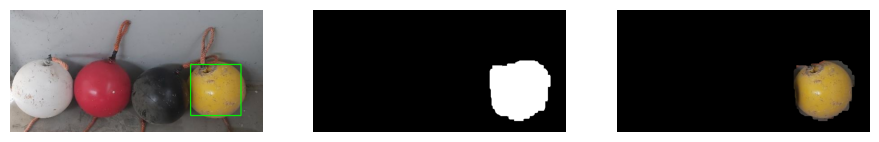

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_largest_yellow_ball(image_path):
    img = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    bounding_box = None
    processed_image = img.copy()

    if len(contours) != 0:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        bounding_box = (x, y, w, h)
        cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return bounding_box, processed_image, mask

image_path = 'buoy.png'
bounding_box, processed_image, mask = find_largest_yellow_ball(image_path)

hsv_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

gaus = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(mask, kernel, iterations=6)
dilation = cv2.dilate(mask, kernel, iterations=6)

erosion_result = cv2.bitwise_and(processed_image, processed_image, mask=erosion)
dilation_result = cv2.bitwise_and(cv2.imread(image_path), cv2.imread(image_path), mask=dilation)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.axis('off')
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 4, 2)
plt.axis('off')
plt.imshow(dilation, cmap='gray')


plt.subplot(1, 4, 3)
plt.axis('off')
plt.imshow(cv2.cvtColor(dilation_result, cv2.COLOR_BGR2RGB))



plt.show()
